# 旋转矩阵

[[矩阵分析] 旋转矩阵的计算机与应用（复平面，RoPE)](https://www.bilibili.com/video/BV1pw411D7nP/?spm_id_from=333.788&vd_source=b843d04bfd7e977261b41de336930b9f)



$$
R(\theta) = \begin{bmatrix}
\cos\theta & - \sin\theta \\
\sin\theta & \cos\theta 
\end{bmatrix}
$$

$$
\begin{aligned}
R(\alpha)\cdot R(\beta) & = \begin{bmatrix}
\cos\alpha & - \sin\alpha \\
\sin\alpha & \cos\alpha 
\end{bmatrix} \cdot \begin{bmatrix}
\cos\beta & - \sin\beta \\
\sin\beta & \cos\beta 
\end{bmatrix}\\
&= \begin{bmatrix}
\cos\alpha \cos\beta-\sin\alpha\sin\beta & - \cos\alpha\sin\beta -\sin\alpha\cos\beta \\
\sin\alpha\cos\beta + \cos\alpha\sin\beta & \cos\alpha\cos\beta - \sin\beta\sin\alpha 
\end{bmatrix}
 \\
& = \begin{bmatrix}
\cos(\alpha+\beta) & -\sin(\alpha+\beta) \\
\sin(\alpha+\beta) & \cos(\alpha+\beta)
\end{bmatrix}
\end{aligned}
$$

- $||R(\theta)|| = 1$， 行列式为1
- 乘以一个向量
    - 只改变向量的角度，不改变模长
    - 逆时针旋转

In [1]:
import numpy as np

In [2]:
def rot_matrix(theta):
    return np.asarray([[np.cos(theta), -np.sin(theta)], 
                       [np.sin(theta), np.cos(theta)]])

In [3]:
print(rot_matrix(0.1))

[[ 0.99500417 -0.09983342]
 [ 0.09983342  0.99500417]]


In [4]:
x = np.asarray([1, 0])

In [6]:
R1 = rot_matrix(np.pi/6) # 180/6 = 30度

In [12]:
x_prime = R1.dot(x)
x_prime, np.linalg.norm(x_prime) # 模长没有改变

(array([0.8660254, 0.5      ]), 1.0)

In [8]:
import matplotlib.pyplot as plt

(-0.5, 1.5)

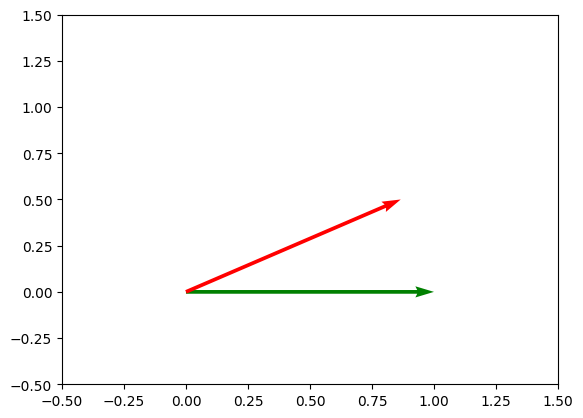

In [11]:
plt.quiver([0, 0], [0, 0], [x[0], x_prime[0]], [x[1], x_prime[1]], 
          angles="xy", scale_units="xy", scale=1, color= ['g', 'r']) 
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

In [13]:
# 向量夹角计算 cos theta = a*b / |a||b|
x_prime.dot(x)

0.8660254037844387

In [16]:
np.cos(np.pi/6) == x_prime.dot(x)

True

In [17]:
# 连乘
R2 = rot_matrix(np.pi/6)
x_prime2 = R2.dot(R1).dot(x)
x_prime2

array([0.5      , 0.8660254])

In [18]:
np.linalg.norm(x_prime2)

1.0

In [19]:
x_prime2.dot(x)

0.5000000000000001

In [20]:
np.cos(np.pi/3) == x_prime2.dot(x)

True

(-0.5, 1.5)

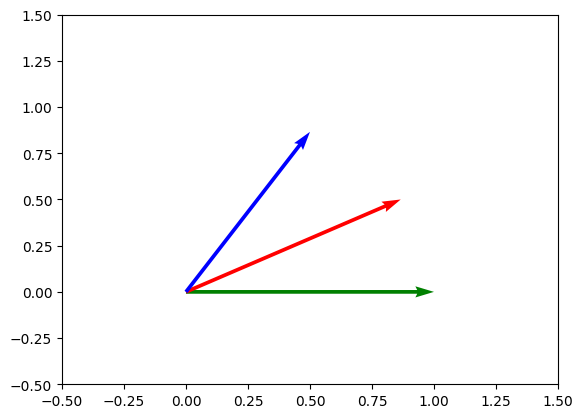

In [21]:
plt.quiver([0, 0, 0], [0, 0, 0], [x[0], x_prime[0], x_prime2[0]], [x[1], x_prime[1], x_prime2[1]], 
          angles="xy", scale_units="xy", scale=1, color= ['g', 'r', 'b']) 
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

## 复平面 complex plane

- $z=a+ib$
    - $r=1,a = \cos\theta, b=\sin\theta$
    - $z = \cos\theta + i\sin\theta$

In [22]:
rot = np.cos(np.pi/6) + 1j*np.sin(np.pi/6)
x 

array([1, 0])

In [23]:
rot

(0.8660254037844387+0.49999999999999994j)

In [26]:
np.real(rot * (x[0]+1j*x[1])) # 30°

0.8660254037844387

In [27]:
np.imag(rot * (x[0]+1j*x[1]))

0.49999999999999994

In [28]:
rot *= rot
np.real(rot * (x[0]+1j*x[1])) # 60

0.5000000000000002